<a href="https://colab.research.google.com/github/pgomezponce/MFC-Business-Case/blob/main/Project_Enabler_Use_Case_Python_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First steps
Please, drag and drop to Google Colaboratory the CSV provided over Part C within the assets provided.

In [1]:
#@title Load dataset
# Load the dataset
import pandas
import matplotlib as mpl
import datetime
import numpy
mpl.pyplot.style.use('fivethirtyeight')
mpl.pyplot.rcParams["figure.figsize"] = (20,3)
mpl.pyplot.rcParams["figure.dpi"] = 200
dataframe = pandas.read_csv("/content/Dataset_BusinessCase.csv", delimiter=",", header=0)
dataframe['Timestamp'] = pandas.to_datetime(dataframe['Timestamp'], format="%d/%m/%Y %H:%M:%S")

In [2]:
#@title Defining useful functions

def round_dataframe_date(df: pandas.DataFrame, format_round: str="Day"):
  rdd2 = df.copy()
  if format_round == "Day":
    rdd2['Timestamp'] = rdd2['Timestamp'].dt.floor('D')
  elif "Week" == format:
    rdd2['Timestamp'] = rdd2['Timestamp'].dt.floor('W')
  elif "Month" == format:
    rdd2['Timestamp'] = rdd2['Timestamp'].dt.floor('M')
  else:
    rdd2['Timestamp'] = rdd2['Timestamp'].dt.floor('D')
  return rdd2

def to_period_dataframe_date(df: pandas.DataFrame, format: str="D"):
  df2 = df.copy()
  if format == 'Day':
    df2['Timestamp'] = df2['Timestamp'].dt.to_period("D")
  elif "Week" == format:
    df2['Timestamp'] = df2['Timestamp'].dt.to_period("W")
  elif "Month" == format:
    df2['Timestamp'] = df2['Timestamp'].dt.to_period("M")
  else:
    df2['Timestamp'] = df2['Timestamp'].dt.to_period("D")

  return df2
  

In [3]:
#@title ¿Want to check if the dataset is loaded? Run this cell
# Check if the datasheed loads
dataframe.sort_values('Timestamp', ascending=False).head(n=15)


,SKU ID,SKU Name,From_Qty,To_Qty,Timestamp,Days since last check,Cause,Reference,Reporting User
998,37,37,92,3,2023-02-28 12:57:00,280,Business Rule,20230228rc,USER_5
997,50,50,76,26,2023-02-28 12:50:00,280,Business Rule,20230228rc,USER_5
996,39,39,29,83,2023-02-28 12:47:00,266,Business Rule,20230228rc,USER_4
995,34,34,85,33,2023-02-28 12:28:00,273,Business Rule,20230228rc,USER_4
994,39,39,95,69,2023-02-28 12:13:00,266,Business Rule,20230228rc,USER_3
993,42,42,10,34,2023-02-28 12:11:00,259,Business Rule,20230228rc,USER_1
992,9,9,91,9,2023-02-28 11:55:00,266,Business Rule,20230228rc,USER_4
991,28,28,27,19,2023-02-28 11:50:00,266,Business Rule,20230228rc,USER_3
990,12,12,33,63,2023-02-28 11:29:00,280,Business Rule,20230228rc,USER_2
989,46,46,79,77,2023-02-28 10:46:00,266,Business Rule,20230228rc,USER_5


# KPI development

In [4]:
from logging import debug
#@title Number of inventory checks done (overall)
df = dataframe.copy()
days_with_inventory_check = to_period_dataframe_date(df=df, format="Day")['Reference'].nunique()
print("-------------------------------------------------------")
print("We have done {0} check(s) overall".format(days_with_inventory_check))
print("-------------------------------------------------------")


-------------------------------------------------------
We have done 45 check(s) overall
-------------------------------------------------------


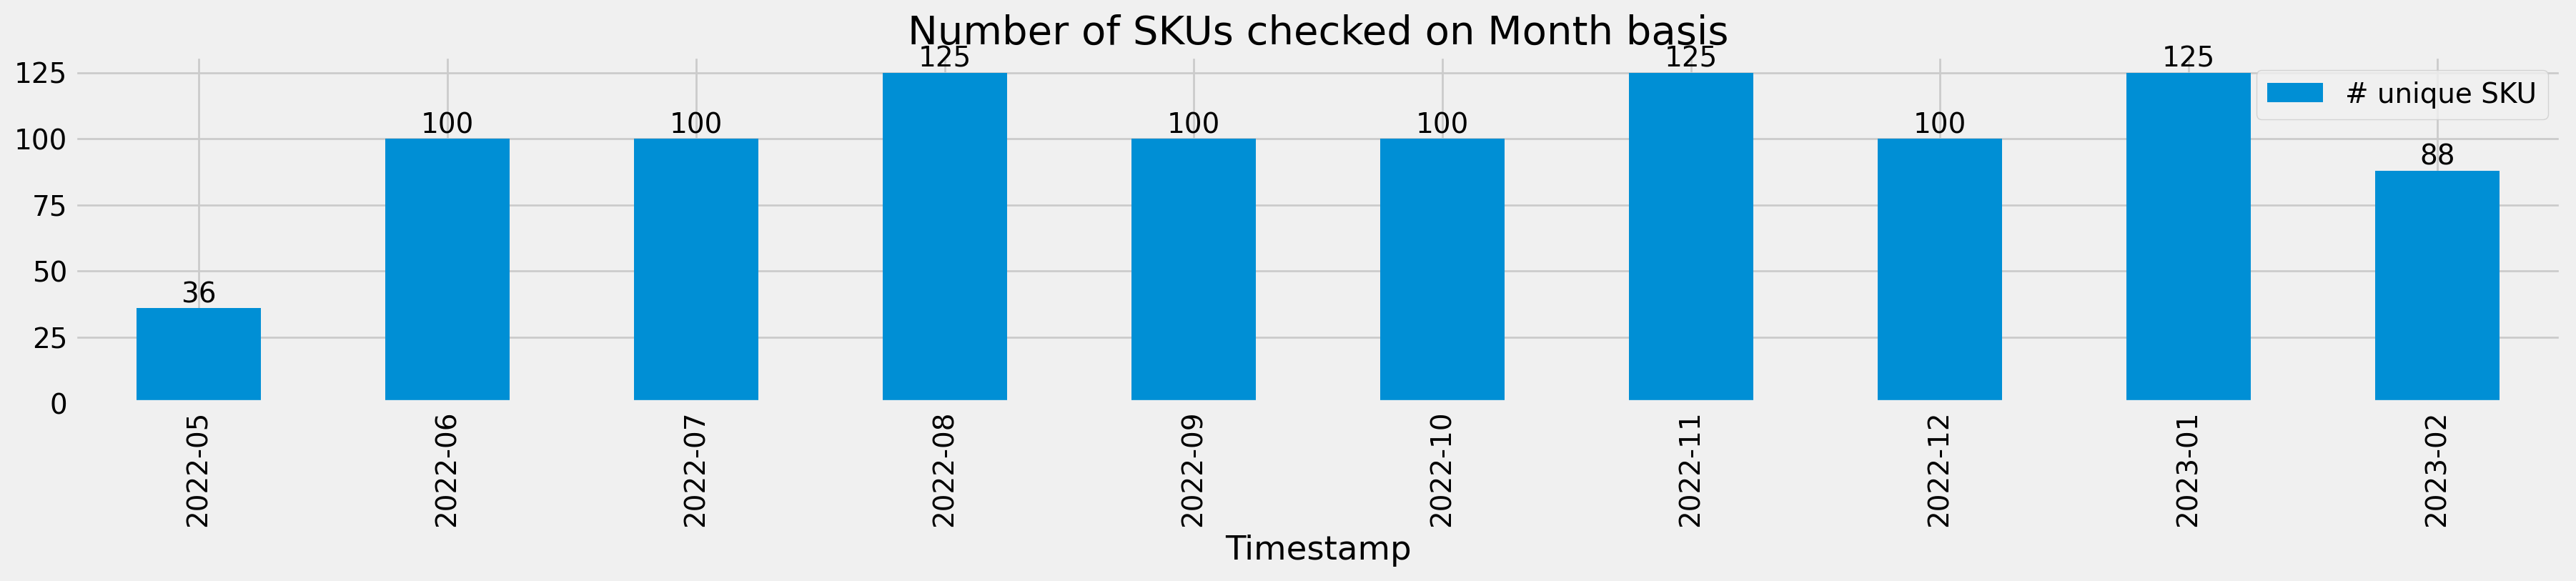

In [5]:
#@title SKUs checked over inventory checks done
format = "Month" #@param ["Day", "Week", "Month"]
df_sku_ic = to_period_dataframe_date(dataframe, format).groupby('Timestamp')['SKU ID'].count()
df_sku_ic = df_sku_ic.rename('# unique SKU')

ax = df_sku_ic.plot(legend=True, kind='bar', title="Number of SKUs checked on {0} basis".format(format))
ax.bar_label(ax.containers[0]);

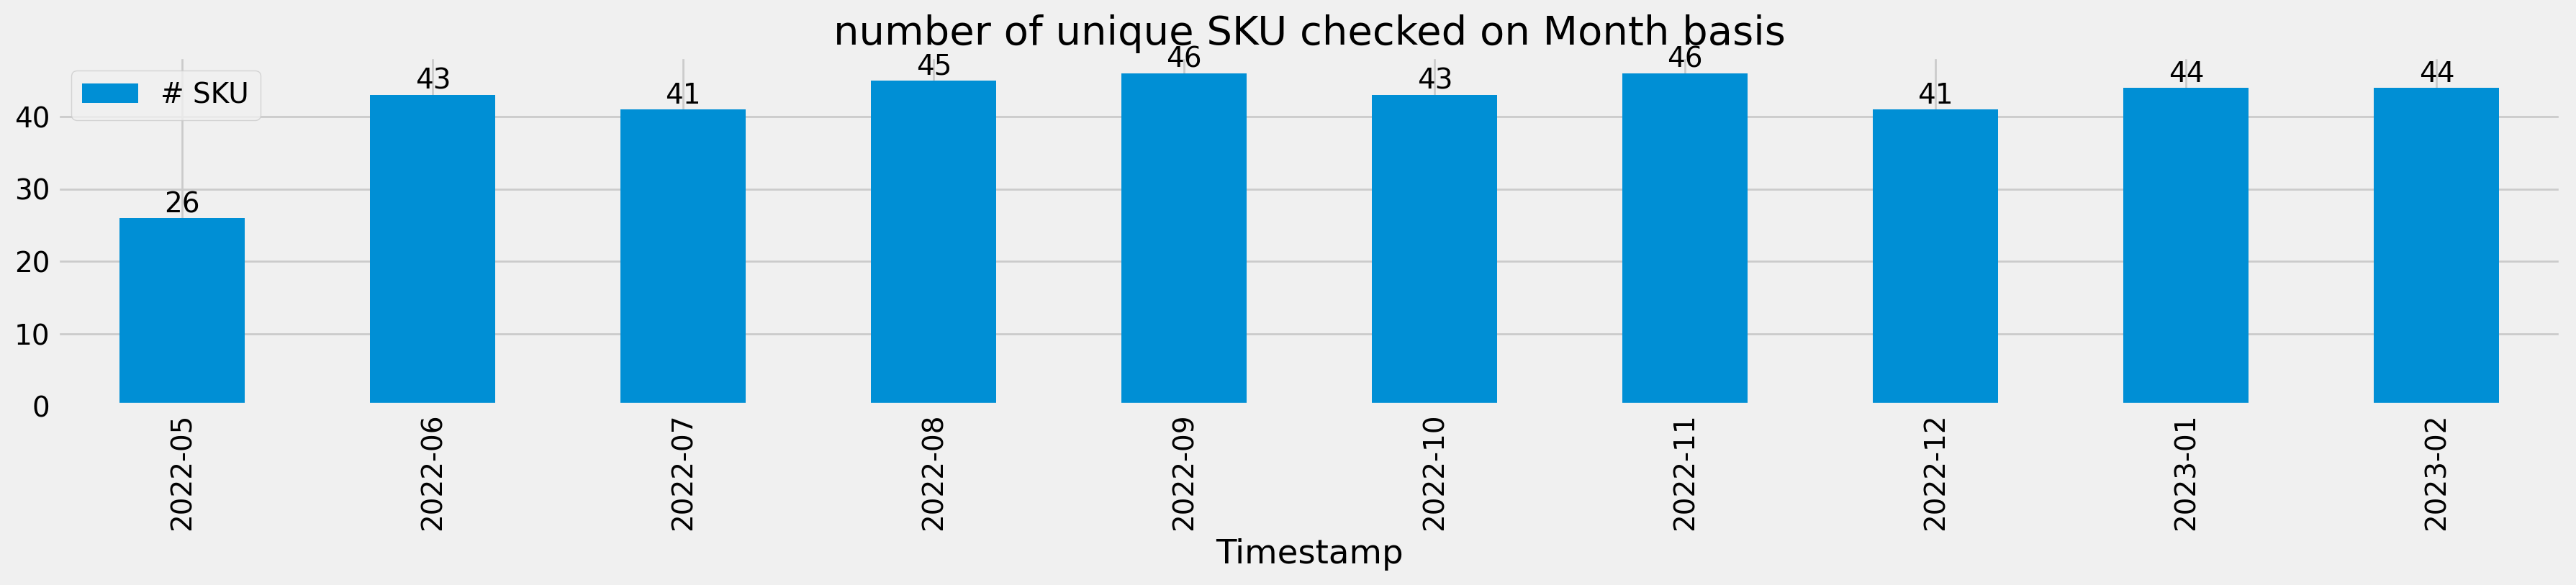

In [6]:
#@title SKUs checked over inventory checks done (time period aware)
format = "Month" #@param ["Day", "Week", "Month"]
df_sku_ic = to_period_dataframe_date(dataframe,format).groupby('Timestamp')['SKU ID'].nunique()
df_sku_ic = df_sku_ic.rename('# SKU')

ax = df_sku_ic.plot(legend=True, kind='bar', title="number of unique SKU checked on {0} basis".format(format))
ax.bar_label(ax.containers[0]);

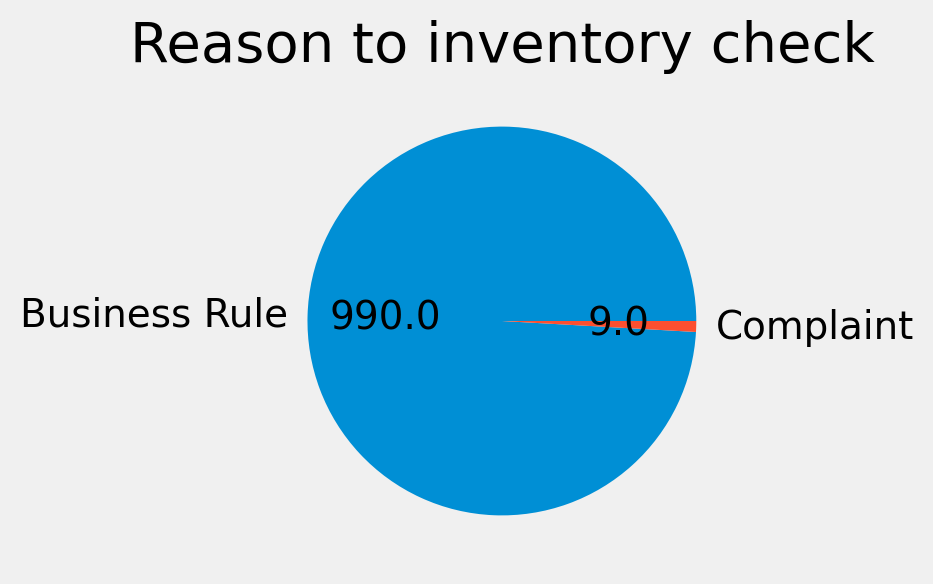

In [7]:
#@title Reasons to do inventory checks
df_sku_ic = to_period_dataframe_date(dataframe, format).groupby('Cause')['Reference'].count()
df_sku_ic = df_sku_ic.rename('')
def absolute_value(val):
    a  = numpy.round(val/100.*df_sku_ic.sum(), 0)
    return a

ax = df_sku_ic.plot(kind='pie', autopct=absolute_value, title="Reason to inventory check");

In [8]:
#@title Days since last inventory check
df2 = dataframe.copy()

time_past = (datetime.datetime.today() - df2['Timestamp'].max()).days
print("-------------------------------------------------------")
print("It has been {0} day(s) since last inventory check".format(time_past))
print("-------------------------------------------------------")


-------------------------------------------------------
It has been 19 day(s) since last inventory check
-------------------------------------------------------


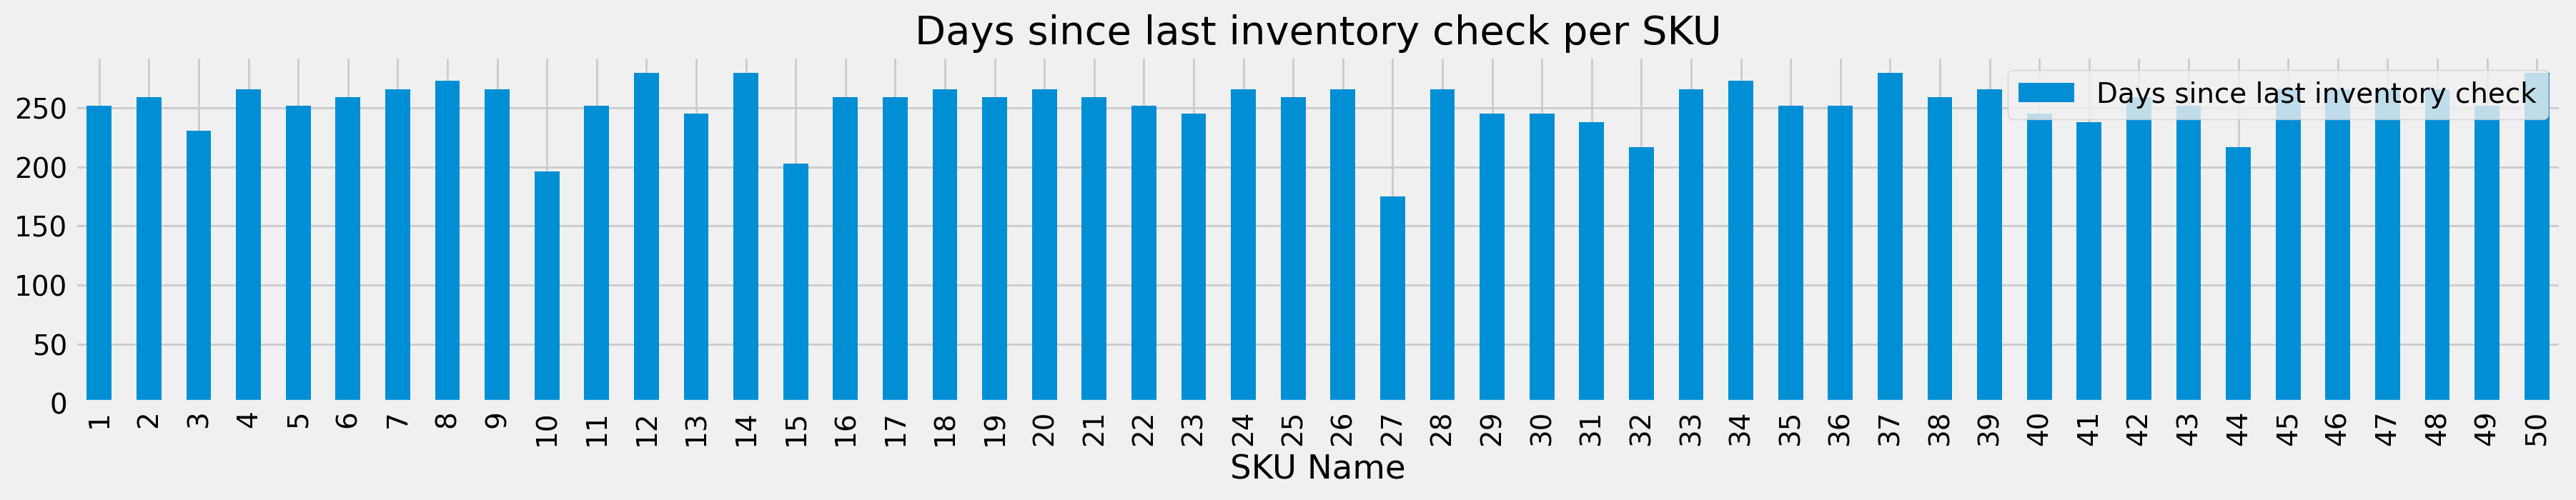

In [9]:
#@title Days since last inventory check per SKU

df = round_dataframe_date(dataframe).sort_values(by='Timestamp', ascending=False).groupby('SKU Name')['Days since last check'].first()
df = df.rename('Days since last inventory check')
df.plot(kind='bar', legend=True, title="Days since last inventory check per SKU");


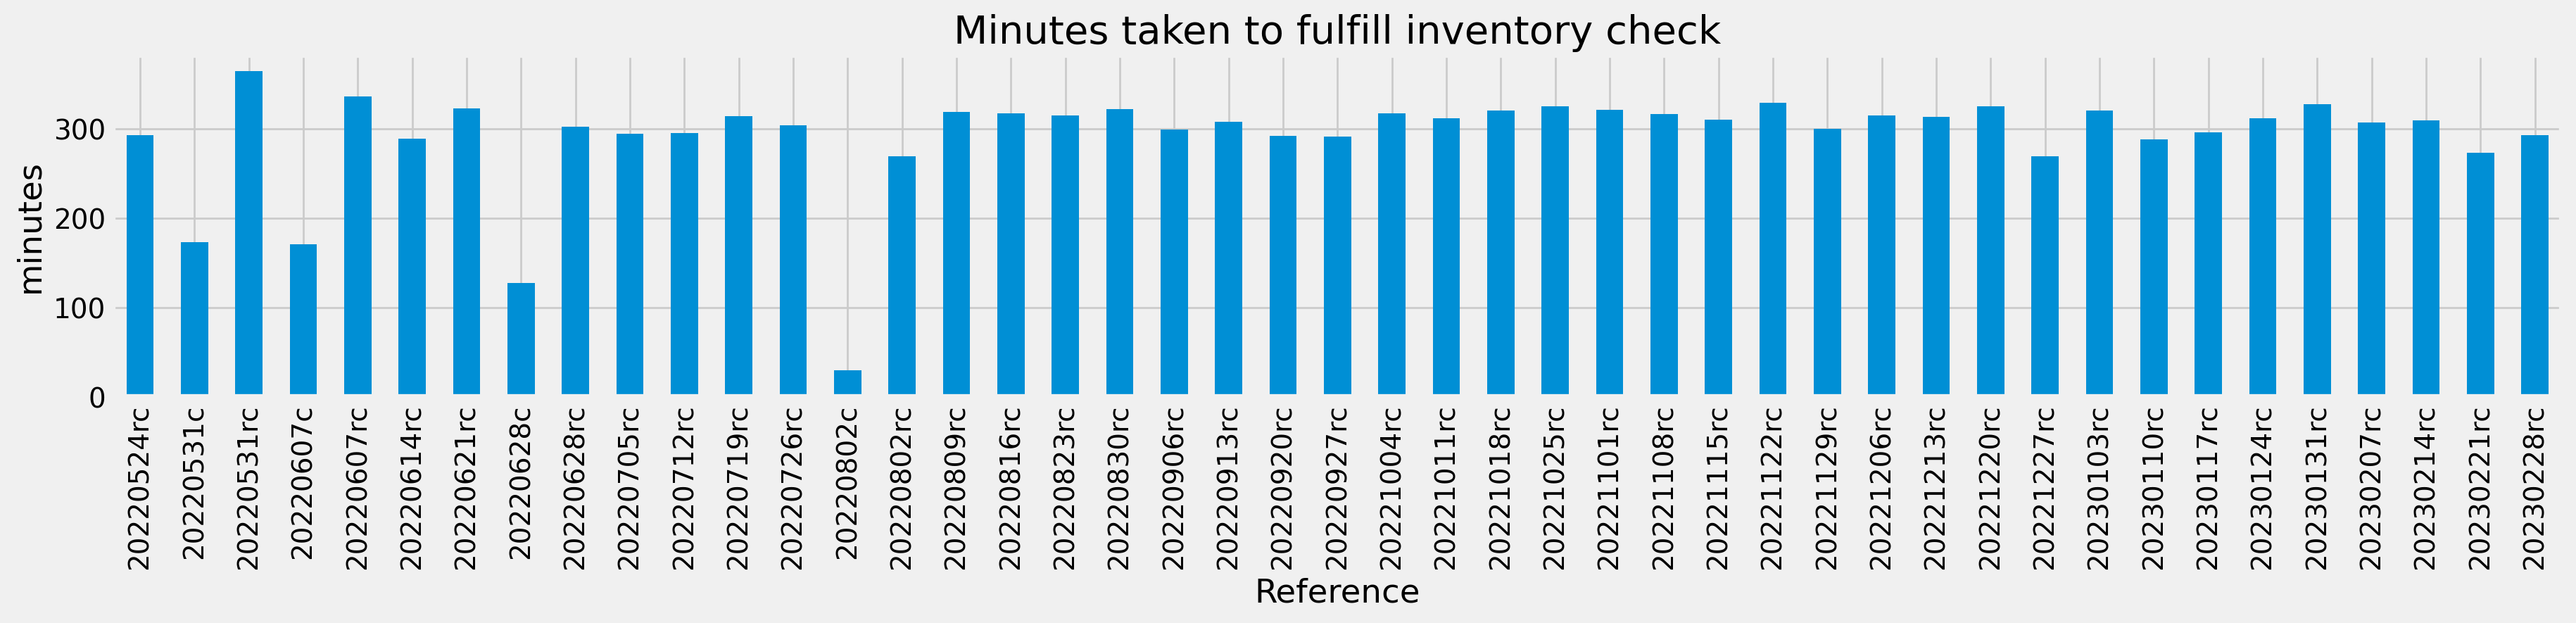

In [10]:
#@title Average Time to do inventory check

df = dataframe.copy()

df2 = df.assign(round_day = to_period_dataframe_date(df=df)['Timestamp'])
df2 = df2.replace('Timestamp', df['Timestamp'])

df3 = pandas.DataFrame({'fromdate': df2.groupby('Reference')['Timestamp'].min() - datetime.timedelta(minutes=30), 'todate': df2.groupby('Reference')['Timestamp'].max().values})
(df3.todate-df3.fromdate).astype('timedelta64[m]').plot(kind='bar',ylabel="minutes", title="Minutes taken to fulfill inventory check");


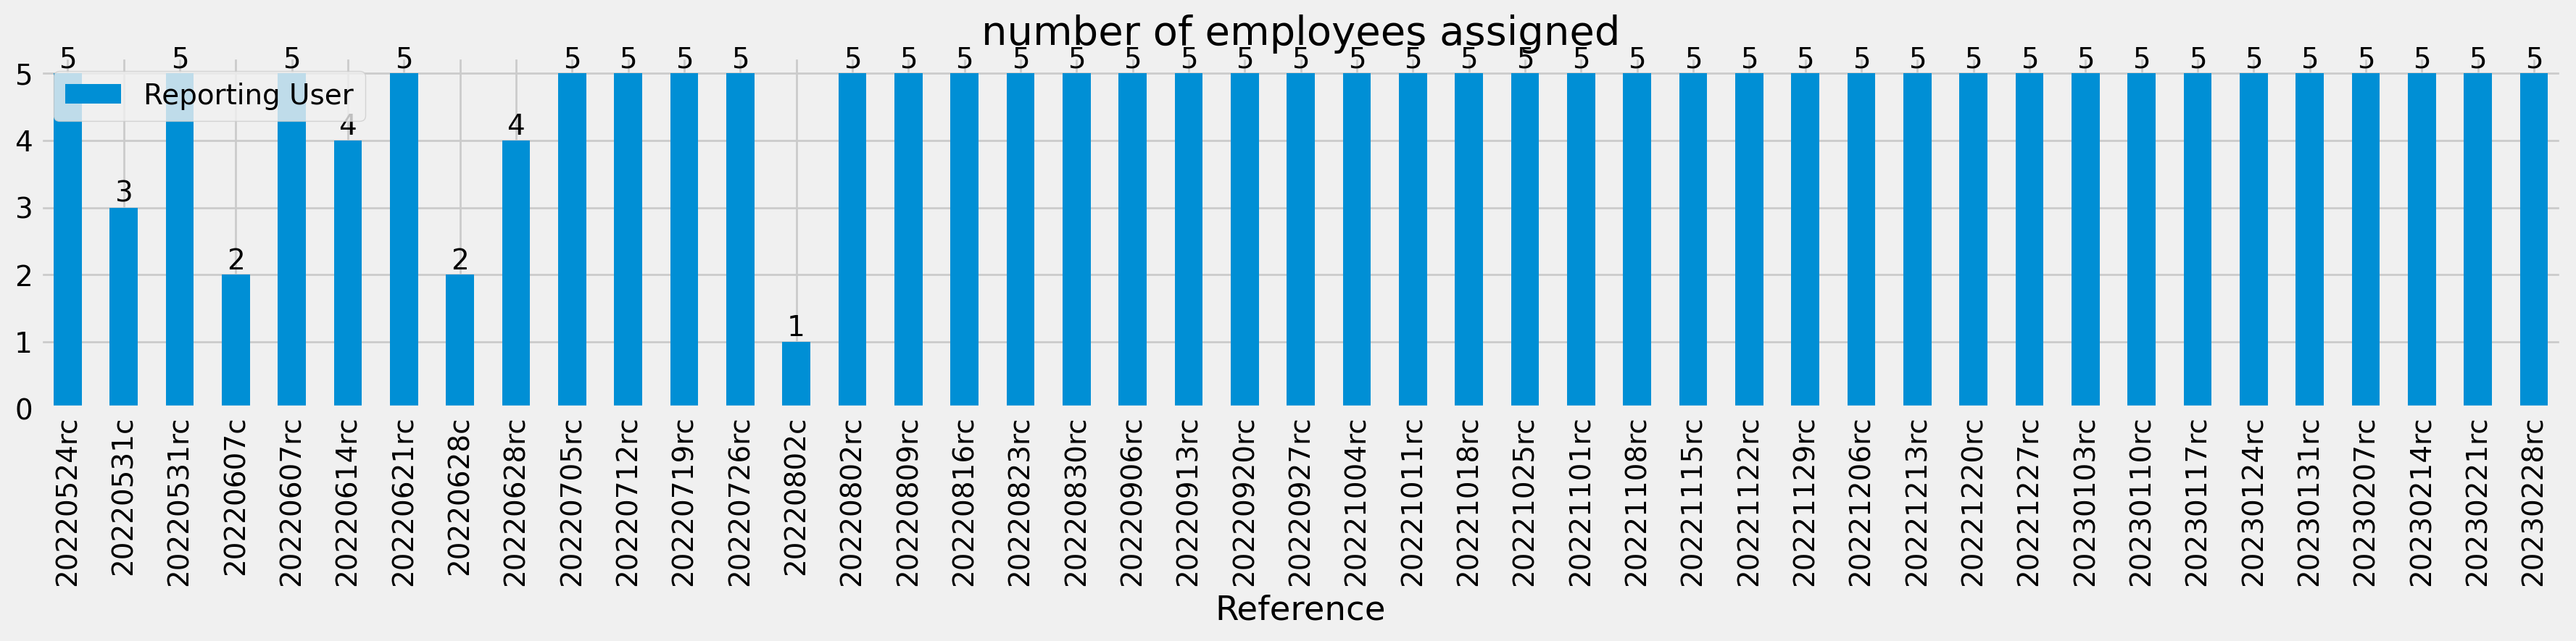

In [11]:
#@title People that contributed to do inventory check

df = dataframe.copy()

df2 = df.groupby('Reference')['Reporting User'].nunique()
#df2.plot()

ax = df2.plot(legend=True, kind='bar', title="number of employees assigned")
ax.bar_label(ax.containers[0]);

In [12]:
#@title Overall people that contributed to do inventory check

df = dataframe.copy()

df2 = df.groupby('Reference')['Reporting User'].nunique()

print("-------------------------------------------------------")
print("In average, {0} people contributed to each inventory check".format(round(df2.mean())))
print("-------------------------------------------------------")

-------------------------------------------------------
In average, 5 people contributed to each inventory check
-------------------------------------------------------


In [13]:
#@title Overall Average Time to do inventory check

df = dataframe.copy()

df2 = df.assign(round_day = to_period_dataframe_date(df=df)['Timestamp'])
df2 = df2.replace('Timestamp', df['Timestamp'])

df3 = pandas.DataFrame({'fromdate': df2.groupby('Reference')['Timestamp'].min() - datetime.timedelta(minutes=30), 'todate': df2.groupby('Reference')['Timestamp'].max().values})

print("----------------------------------------------------------")
print("We could take {0} minutes to complete an inventory check".format(round((df3.todate-df3.fromdate).astype('timedelta64[m]').mean())))
print("----------------------------------------------------------")


----------------------------------------------------------
We could take 292 minutes to complete an inventory check
----------------------------------------------------------


## SKU Availability

In [14]:
#@title Overall Customer-available but non-on-hand SKUs


print("-------------------------------------------------------")
print("We have had {0} Customer-available but non-on-hand SKU(s) overall".format(dataframe[(dataframe['To_Qty'] == 0) & (dataframe['From_Qty'] != 0)].nunique()['SKU ID']))
print("-------------------------------------------------------")


-------------------------------------------------------
We have had 8 Customer-available but non-on-hand SKU(s) overall
-------------------------------------------------------


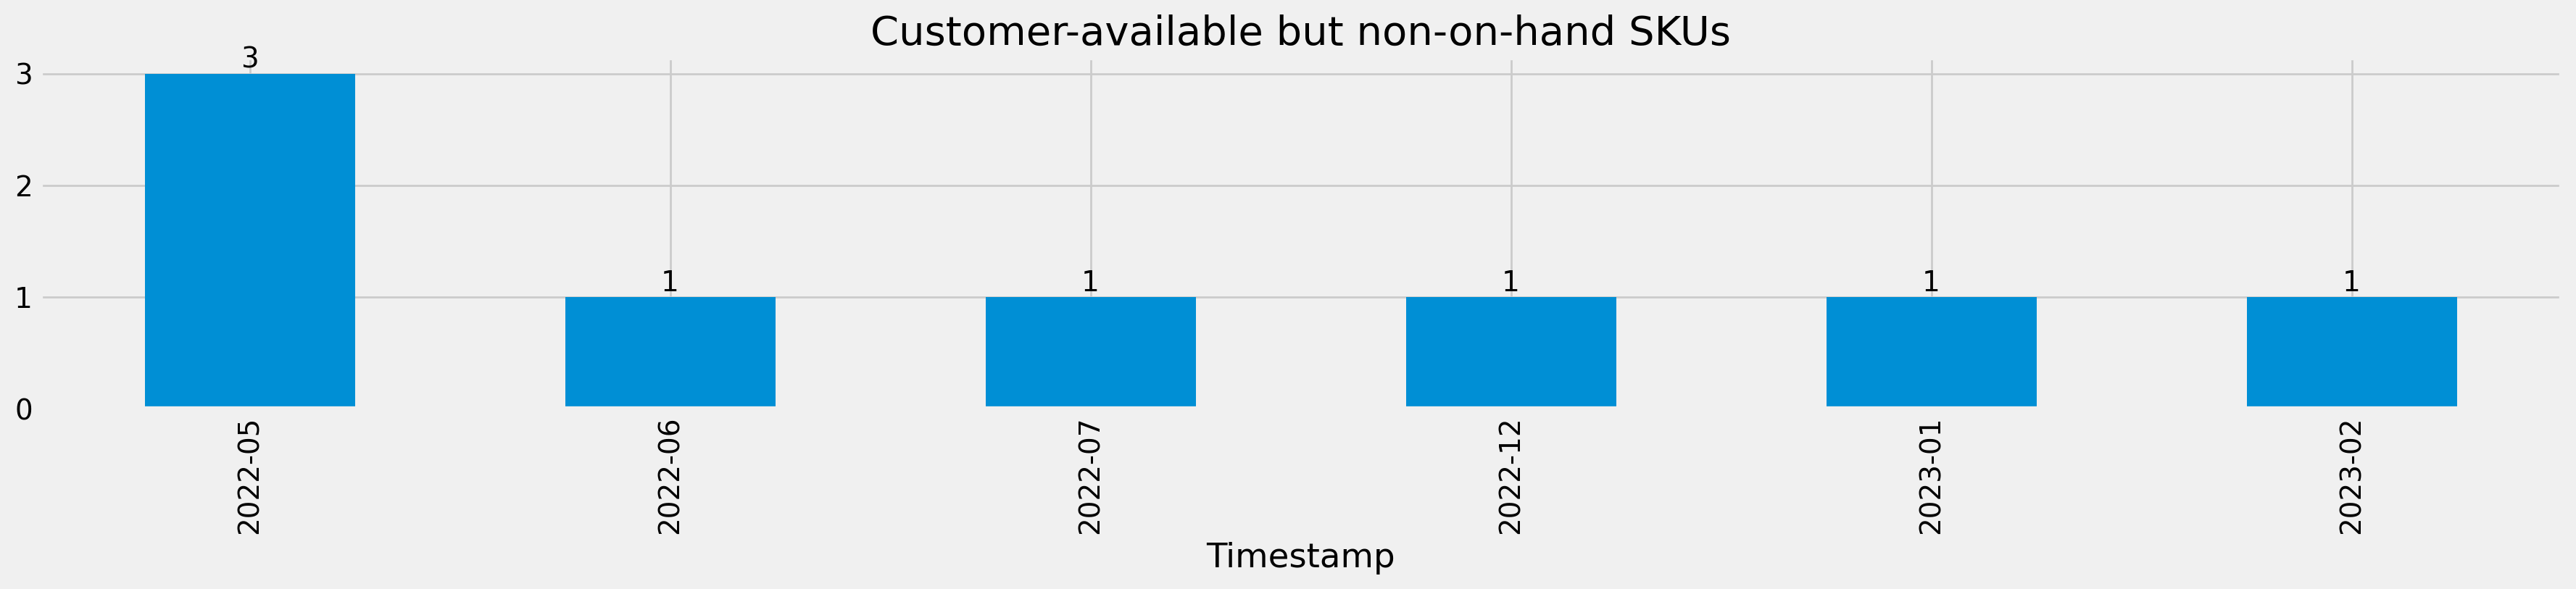

In [15]:
#@title Trend: Customer-available but non-on-hand SKUs

df2 = pandas.DataFrame(dataframe[(dataframe['To_Qty'] == 0) & (dataframe['From_Qty'] != 0)])
plottable = to_period_dataframe_date(df2,format).groupby('Timestamp')['SKU ID'].count()
plottable.rename('Customer-available but non-available SKUs')
ax = plottable.plot(kind='bar', title="Customer-available but non-on-hand SKUs");
ax.bar_label(ax.containers[0]);

In [16]:
#@title Customer-disabled but available SKUs
print("-------------------------------------------------------")
print("We have had {0} Customer-disabled but available article(s) overall".format(dataframe[(dataframe['From_Qty'] == 0) & (dataframe['To_Qty'] !=0)]['To_Qty'].sum()))
print("-------------------------------------------------------")


-------------------------------------------------------
We have had 74 Customer-disabled but available article(s) overall
-------------------------------------------------------


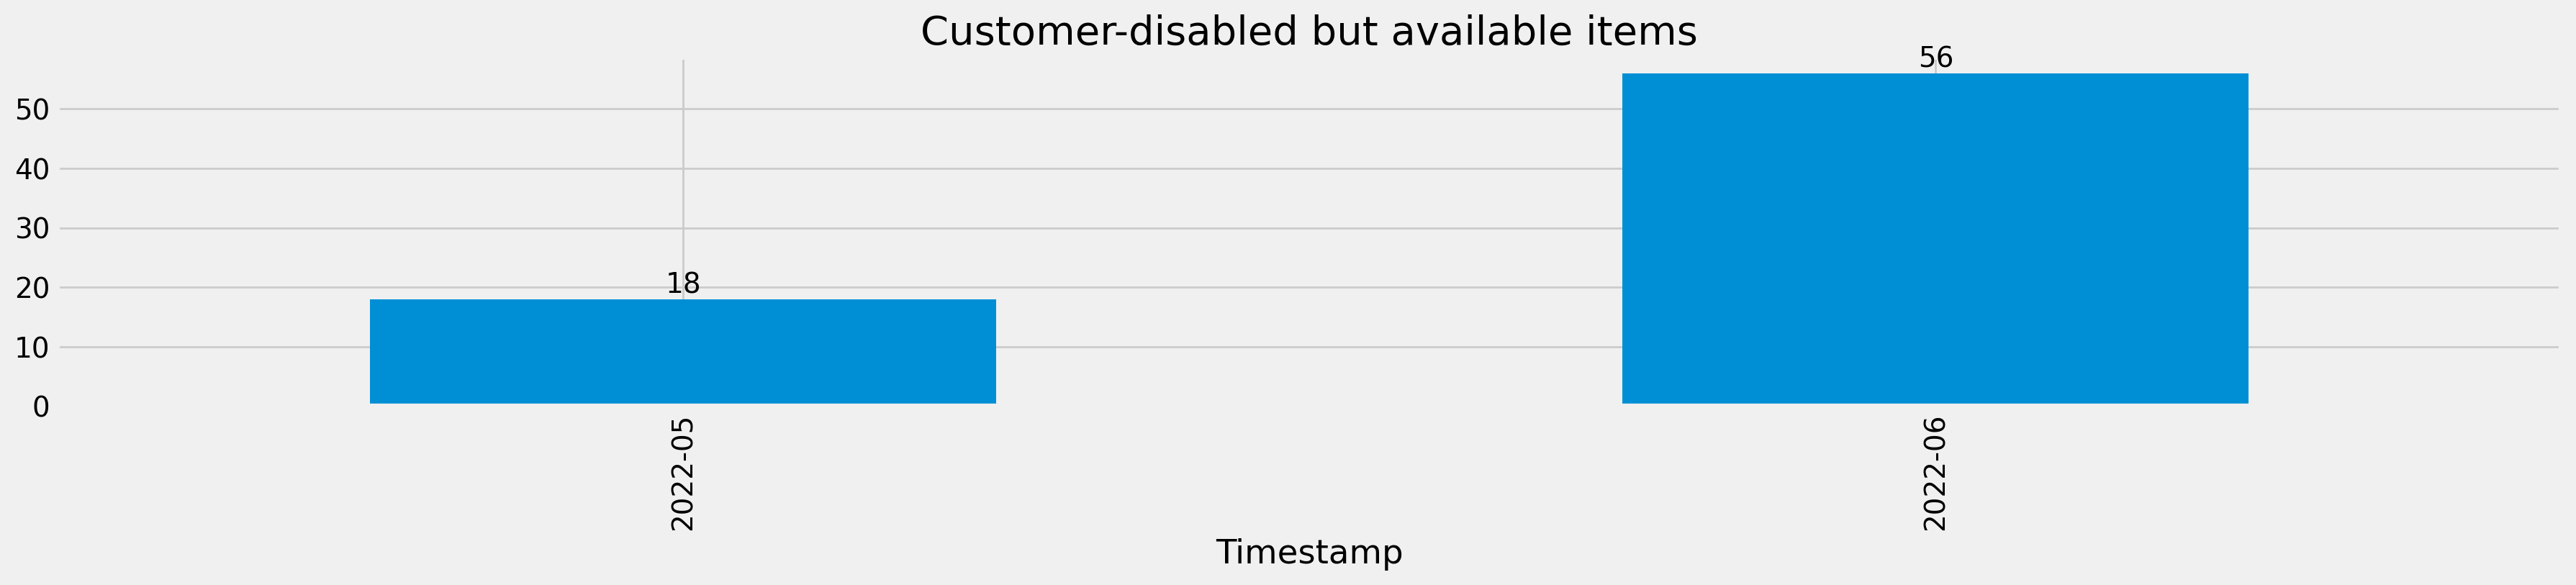

In [17]:
#@title Trend: Customer-disabled but available SKUs
format = "Month" #@param ["Day", "Week", "Month"]

df2 = pandas.DataFrame(dataframe[(dataframe['From_Qty'] == 0) & (dataframe['To_Qty'] !=0)])
plottable = to_period_dataframe_date(df2, format).groupby('Timestamp')['To_Qty'].sum()
plottable.rename('Customer-available but non-available items')
ax = plottable.plot(kind='bar', title="Customer-disabled but available items" );
ax.bar_label(ax.containers[0]);

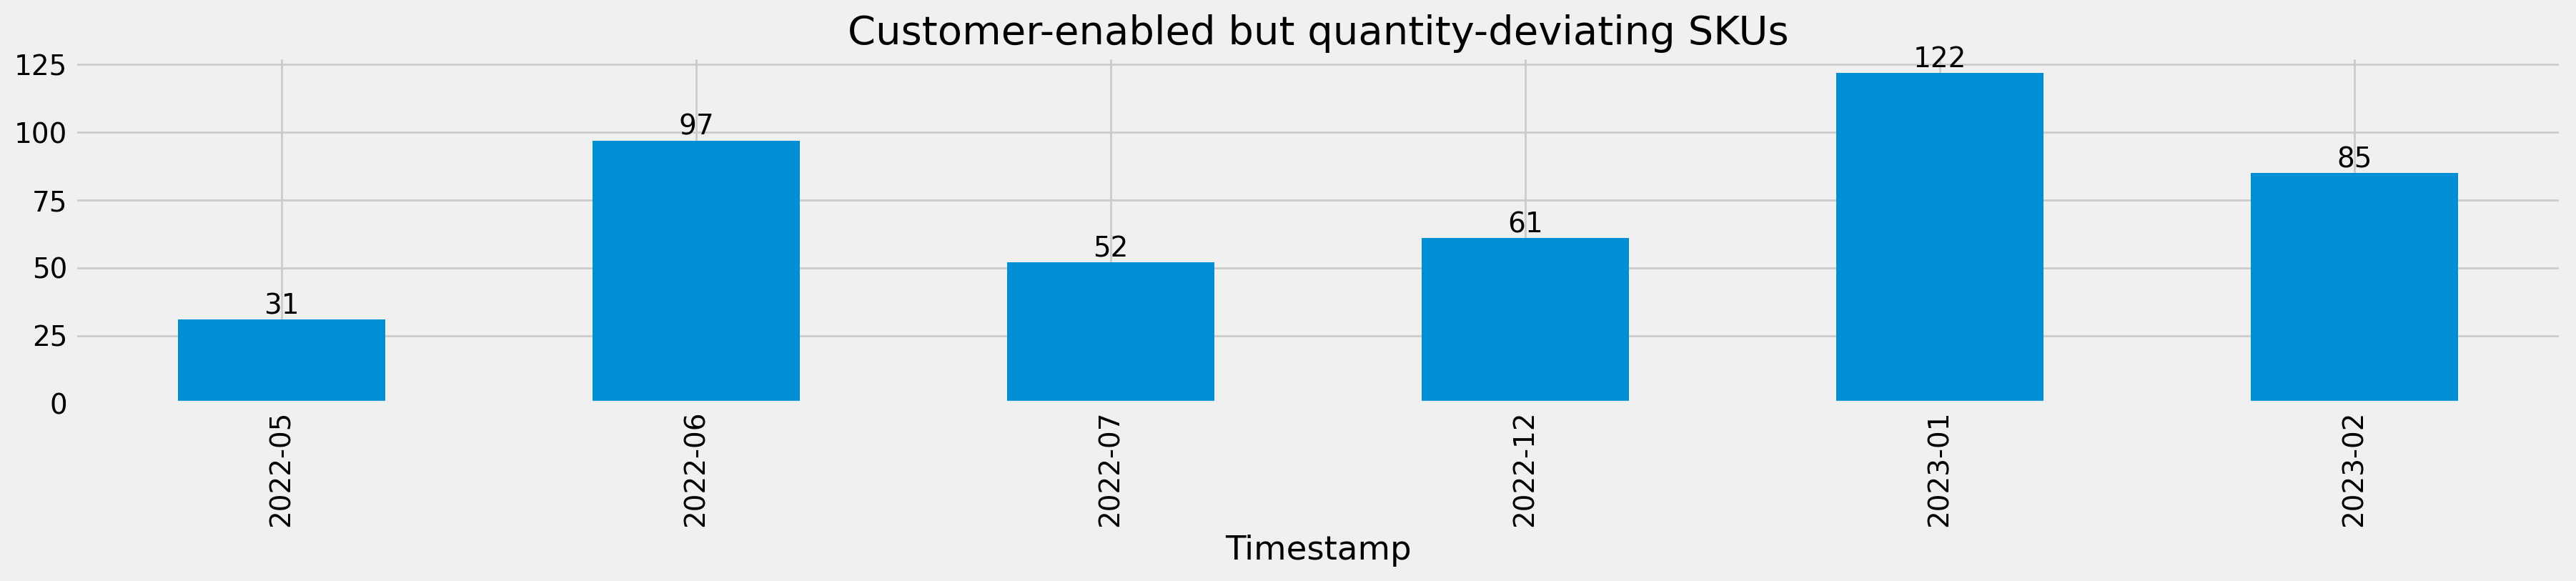

In [18]:
#@title Customer-enabled but quantity-deviating SKUs
format = "Month" #@param ["Day", "Week", "Month"]
df2 = dataframe[(dataframe['To_Qty'] != 0) & (dataframe['From_Qty'] != 0) & (dataframe['From_Qty'] != dataframe['To_Qty'])].copy()
ax = to_period_dataframe_date(df2,format).groupby('Timestamp')['SKU ID'].count().plot(kind='bar', title="Customer-enabled but quantity-deviating SKUs");
ax.bar_label(ax.containers[0]);

In [19]:
#@title Overall customer-enabled but quantity-deviating SKUs

df2 = dataframe[(dataframe['To_Qty'] != 0) & (dataframe['From_Qty'] != 0) & (dataframe['From_Qty'] != dataframe['To_Qty'])].copy()


print("-------------------------------------------------------")
print("We have had {0} customer-enabled but quantity-deviating SKU(s) overall".format(round((to_period_dataframe_date(df2,format).groupby('Timestamp')['SKU ID'].count()).mean())))
print("-------------------------------------------------------")

-------------------------------------------------------
We have had 75 customer-enabled but quantity-deviating SKU(s) overall
-------------------------------------------------------


## Rework

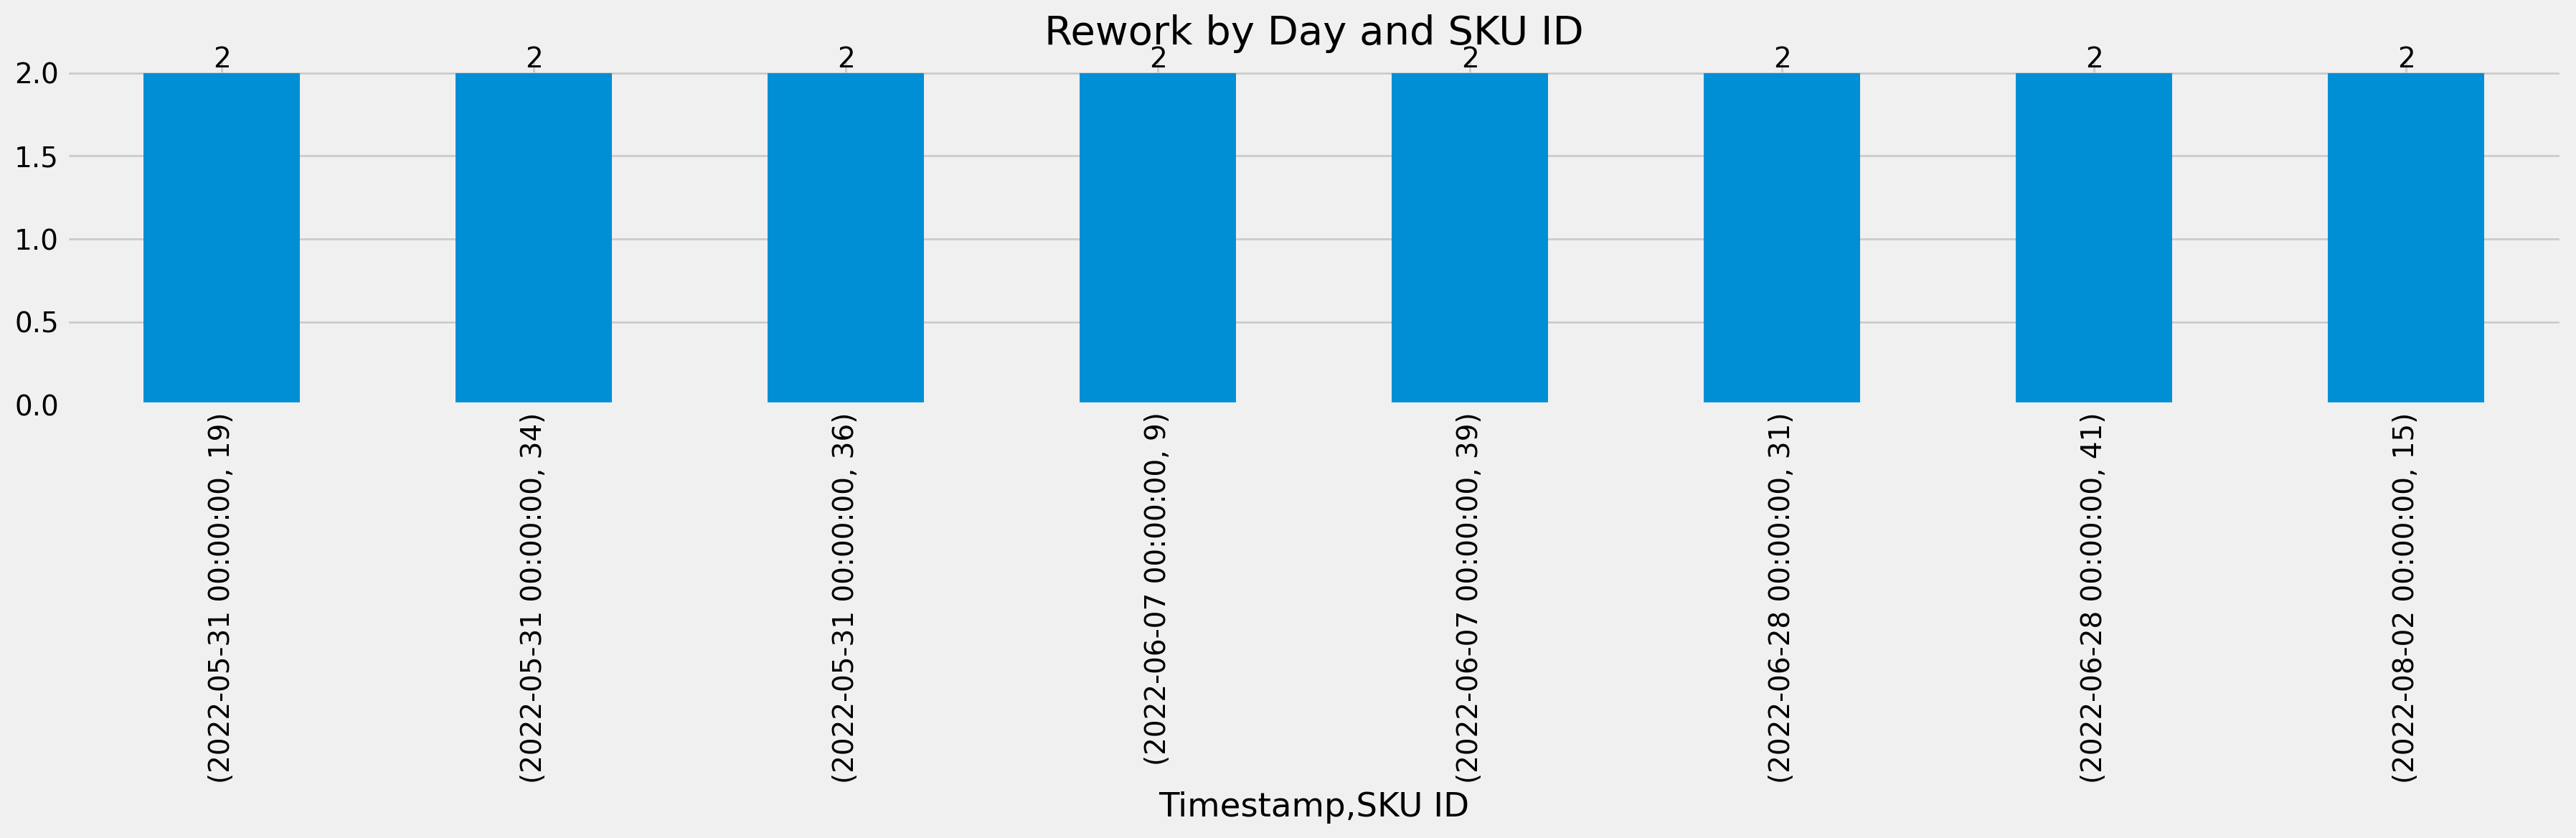

In [20]:
#@title Rework
format = "Day" #@param ["Day", "Week", "Month"]
df = round_dataframe_date(df=dataframe, format_round=format)

df = df.groupby(['Timestamp', 'SKU ID'])['Reference'].nunique()
if len(df[df.values > 1]) != 0:
  ax = df[df.values > 1].plot(kind='bar', title="Rework by Day and SKU ID")
  ax.bar_label(ax.containers[0]);
else:
  print('No rework')